<a href="https://colab.research.google.com/github/a-forty-two/DataSetsForML/blob/master/14_Word2Vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:


# NLTK/Spacy, Textacy, Gensim 
# NLTK/SPACY -> token,segmentation, pieces of NLP
# Textacy/Gensim -> rich functions to make NLP tasks easy 
# 0.5 > pos, <0.5 neg 
# CLASSIFICATIOn (Language/Sentiment/Chatbot) and REGRESSION (Prediction neighboring word)

# words = { the, day, looks , good } -> bag of words -> a set of words (note that order doesn't matter in set)
# yesterday-> classification using Bag or Words -> Spanish and English 

# the day looks ____ -> good 
# EMBEDDING Layer has to somehow generate embeddings that can help you predict next word (Rather than predicting the 
# class of existing word)

# Idea behind vectorization to predict neighbor -> Train a network to predict next word, and transfer learn its weights
# 1) Word pairs -> continuous bag of words! 
# 2) Then prep this as training
# 3) create a 3 layer network-> feed the word and predict the output! 
# 4) remove the last layer! keep the input/hidden layer
# 5) whatever weight recieved from hidden layer the new vector for the word!!! -> Generating feature from NN

In [0]:
import numpy as np
import tensorflow as tf
corpus_raw = """He is the rich guy. The rich guy is happy person. She is rich girl. The Hundred Years War had begun in 1337. As an inheritance dispute over the French throne, interspersed with occasional periods of relative peace. Nearly all the fighting had taken place in France, and the English armys use of chevauchée tactics, destructive "scorched earth" raids, had devastated the economy. I'm not your pal, guy. I'm not your guy, friend. I'm not your friend, pal. I'm not your pal, buddy."""
corpus_raw = corpus_raw.lower()
corpus_raw

'he is the rich guy. the rich guy is happy person. she is rich girl. the hundred years war had begun in 1337. as an inheritance dispute over the french throne, interspersed with occasional periods of relative peace. nearly all the fighting had taken place in france, and the english armys use of chevauchée tactics, destructive "scorched earth" raids, had devastated the economy. i\'m not your pal, guy. i\'m not your guy, friend. i\'m not your friend, pal. i\'m not your pal, buddy.'

In [0]:
# a whole bag of words 
words = []
for word in corpus_raw.split():
  if word != '.' and word!=',':
    word = word.replace('.', '') # REPLACE WITH REGEX for , and other chars you want ignored
    words.append(word)

print(words)
print(len(words))
words = set(words)
print(words)
print(len(words))

['he', 'is', 'the', 'rich', 'guy', 'the', 'rich', 'guy', 'is', 'happy', 'person', 'she', 'is', 'rich', 'girl', 'the', 'hundred', 'years', 'war', 'had', 'begun', 'in', '1337', 'as', 'an', 'inheritance', 'dispute', 'over', 'the', 'french', 'throne,', 'interspersed', 'with', 'occasional', 'periods', 'of', 'relative', 'peace', 'nearly', 'all', 'the', 'fighting', 'had', 'taken', 'place', 'in', 'france,', 'and', 'the', 'english', 'armys', 'use', 'of', 'chevauchée', 'tactics,', 'destructive', '"scorched', 'earth"', 'raids,', 'had', 'devastated', 'the', 'economy', "i'm", 'not', 'your', 'pal,', 'guy', "i'm", 'not', 'your', 'guy,', 'friend', "i'm", 'not', 'your', 'friend,', 'pal', "i'm", 'not', 'your', 'pal,', 'buddy']
83
{'1337', 'an', 'over', 'happy', 'devastated', 'as', 'years', 'nearly', 'english', 'your', 'place', 'person', 'pal', 'buddy', 'use', "i'm", '"scorched', 'fighting', 'girl', 'in', 'of', 'with', 'relative', 'peace', 'all', 'and', 'had', 'occasional', 'pal,', 'armys', 'raids,', 'be

In [0]:
word2int = {}
int2word = {}
vocab_size = len(words)
for i,word in enumerate(words): # ANY ORDER OF APPEAREANCE IS FINE 
  word2int[word] = i
  int2word[i] = word 
print(word2int)
print(int2word)

{'1337': 0, 'an': 1, 'over': 2, 'happy': 3, 'devastated': 4, 'as': 5, 'years': 6, 'nearly': 7, 'english': 8, 'your': 9, 'place': 10, 'person': 11, 'pal': 12, 'buddy': 13, 'use': 14, "i'm": 15, '"scorched': 16, 'fighting': 17, 'girl': 18, 'in': 19, 'of': 20, 'with': 21, 'relative': 22, 'peace': 23, 'all': 24, 'and': 25, 'had': 26, 'occasional': 27, 'pal,': 28, 'armys': 29, 'raids,': 30, 'begun': 31, 'is': 32, 'friend,': 33, 'tactics,': 34, 'destructive': 35, 'she': 36, 'hundred': 37, 'interspersed': 38, 'the': 39, 'war': 40, 'not': 41, 'guy,': 42, 'dispute': 43, 'inheritance': 44, 'earth"': 45, 'rich': 46, 'guy': 47, 'economy': 48, 'he': 49, 'france,': 50, 'taken': 51, 'periods': 52, 'friend': 53, 'french': 54, 'throne,': 55, 'chevauchée': 56}
{0: '1337', 1: 'an', 2: 'over', 3: 'happy', 4: 'devastated', 5: 'as', 6: 'years', 7: 'nearly', 8: 'english', 9: 'your', 10: 'place', 11: 'person', 12: 'pal', 13: 'buddy', 14: 'use', 15: "i'm", 16: '"scorched', 17: 'fighting', 18: 'girl', 19: 'in',

In [0]:
print(word2int['rich'])

46


In [0]:
print(int2word[3])

happy


In [0]:
# extract raw sentences from the corpus
rawSentences = corpus_raw.split('.') # . are end of sentences
sentences = []
for sentence in rawSentences:
  sentences.append(sentence.split())

#sentences

In [0]:
# to predict next word, given word, basically i need to create all possible word-sequence pairs
# longest word-sequnce we want to detect is 2-> Rich ___ ? GUY! 
WINDOW_SIZE = 2
data = []
# The algo below will create, all possible combinations of my words, within WINDOW RANGE
for sentence in sentences:
  for wordIndex, word in enumerate(sentence):
    for xword in sentence[max(wordIndex- WINDOW_SIZE,0):min(wordIndex+ WINDOW_SIZE,len(sentence))+1]: 
      if xword != word: # pair detected, check for self detection
        data.append([word,xword])

#data

#wordIndex,word -> 0,Ba 1,ba 2,black 3,sheep
#wordIndex = 1, word = ba
#
#xword =Ba   0:3 -> FIRST 2 words will be selected, if they are different, they are considered word-pair
#word =ba    1:4 -> 2nd and 3rd words will be select, considered word-pair 
#            2:5
#            3:6
#            4:7....


Bye bye guys, i am going home. 

For given Window_size = 3

Bye bye guys, -> {all combinations}

bye guys, i -> all combos

guys, i am ->...

am going home -> all combos 

In [0]:
# how to prep numbers for NN?
# Label ENcoder -> 233, 16 -> does this mean that a word is smaller than the word?
# One-HOT Encoding of Dictionary -> [ 0 0 0 0 ... 0 0] -> mark 1 wherever word is present -> [0 1 0 0 ...0 0]

# convert from words to numbers! Label Encoder, One-Hot (INPUT), Label Binarizer(OUTPUT)!!! 
def Encoder(datapointindex, vocabsize):
  temp = np.zeros(vocabsize) # initialize with a cold vector
  temp[datapointindex] = 1 # wherever word is present, encode that position as hot
  return temp

trainx, trainy = [], []

In [0]:
# ONE-HOT Encoding
for worddata in data:
  try:
    trainx.append(Encoder(word2int[worddata[0]], vocab_size))
    trainy.append(Encoder(word2int[worddata[1]], vocab_size))
  except:
    continue 

trainx = np.asarray(trainx)
trainy = np.asarray(trainy)
print(trainx[0])
print(trainy[0])
print(len(trainx))
print(len(trainy))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
272
272


In [0]:
print(trainx.shape)
print(trainy.shape)

(272, 57)
(272, 57)


In [0]:
# BEGIN THE LEARNING PROCESS 
# Stop word removal may or may not be required, check if it is really required or can you do without it
# because every step takes time! 
# answer questions after reading a topic
# Manoj is good at singing. Pinky was good at singing. 
# is, was , at
# {manoj, good, singing} {pinky, good, singing}

# Q- Back in the days, who would sing good?

In [0]:
HP_embeddims = 5
EPOCHS = 100

x = tf.placeholder(tf.float32, shape=(None, vocab_size)) # infinite rows, dictionary size/column size is fixed
y = tf.placeholder(tf.float32, shape=(None, vocab_size))
w1 = tf.Variable(tf.random_normal([vocab_size, HP_embeddims]))
b1 = tf.Variable(tf.random_normal([HP_embeddims]))
hidden_rep = tf.add(tf.matmul(x,w1), b1) # hidden_rep = x*w1 + b
w2 = tf.Variable(tf.random_normal([HP_embeddims, vocab_size])) # truncated_normal -> between limits, random_normal
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add(tf.matmul(hidden_rep,w2), b2)) 
# every_layer = prev_layer*new_weights + new_bias
# 3 layered model! First layer->w1->Second->w2->Output


In [0]:
prediction # Pytorch -> like Numpy, was dynamic, and gave you answers immediately!
# tf.session() is required to run the code in tf!

<tf.Tensor 'Softmax:0' shape=(?, 57) dtype=float32>

In [0]:
session = tf.Session()
init = tf.global_variables_initializer() # THIS FUNCTION NEEDS TO BE EXECUTED VIA TF SESSION
session.run(init) # all global variables initiated

#y = mx + c

In [0]:
# LOSS FUNCTION
crossEntropy = tf.reduce_mean(-tf.reduce_sum(y*tf.log(prediction), reduction_indices=[1])) 
# FORMULA for cross entropy
# define the training step
trainStep = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(crossEntropy)
HP_epoch = 1000

# train the model
for _ in range(HP_epoch):
  session.run(trainStep, feed_dict={x:trainx, y:trainy})
  #print(".")
  #print(session.run(crossEntropy, feed_dict={x:trainx, y:trainy}))

In [0]:
#print(session.run(w2))
#print("******")
#print(session.run(w1 + b1))
#print("******")
#print(session.run(w2 + b2))
# #p(y) = w * p(x) + bias = w + bias
# #p(x) = 1! that's why i am predict y! p(x)-> probability a word is spoken! 

In [0]:
# p(y) = weights * p(x) + bias 
# X is already the input, hence present, and hence say p(x) = 1
# p(y) = weights + bias 




vectors = session.run(w1+b1) # this is the layer calculating the vectors for conversion!!!

print(vectors[word2int['happy']]) # LEARNING TRANSFERRED!!!! 
print(vectors[word2int['pal']]) # LEARNING TRANSFERRED!!!! 

[-0.46795237 -1.1781824   1.1407243   1.7646775   0.23983225]
[-0.35225546 -0.89992696  1.5022633   0.31927037 -0.9660231 ]


In [0]:
# VECTORIZATION of my data -> convert string into numbers 
# prediction of next word, we have broken every word into learnable dimensions
# BAD EXAMPLE:
# he is a happy boy. he died happy. 
# dim1= happy_before_boy , dim2 = happy_after_died, dim3= happy_asLastWord 

In [0]:
# WORD_VECTOR_SPACE
def euD(v1, v2):
  # ROOT(for_every_point_in_vectors: SQUARE(v2-v1))
  eucledian_distance = np.sqrt(np.sum((v1-v2)**2))
  return eucledian_distance


In [0]:
# Min and max values in array! except, now we are doing it on a network of paths!!! 
# path = connection between vector (v2-v1)
# min -> take a no. tending to inf. Compare a number with it. If the new no. is smaller than min, replace it 
# with min. Repeat this for all numbers. 

def findClosest(wordIndex, vectors):
  min_dist = 99999
  minIndex = -99999
  query = vectors[wordIndex] # TREAT this vector as ORIGIN. And calculate distance with respect to this vector.
  for index, vector in enumerate(vectors):
    # don't calculate distance from same word!
    # else the word itself will be the closest all the time
    ed = euD(vector, query)
    if ed < min_dist and not np.array_equal(vector, query):
      min_dist = ed
      minIndex = index
  return minIndex
# ENGIMA MACHINES -> german , TURING test -> chat is ai or not
# NN hardcoded electrical and mechanical circuits 
# 

In [0]:
vec = word2int['she']
closest = findClosest(vec, vectors)
int2word[closest] 
# if this was a business case, new language or text in a specific way then follow the same approach
# else, for global usage, DON't use this

'friend,'

In [0]:
# lABEL encoding and one-hot both were out
# label encoder -> easily guessable! it's simply a map! 
# one-hot -> increased the siZe!!! each vector is represented by 1-hot vector-sized matrix!
# if dic_size = 5 , and i had a sentence 1st,2nd, 1st, 2nd, 5th, 4th
# [1 0 0 0 0], [0 1 0 0 0], [1 0 0 0 0], [0 1 0 0 0], [0 0 0 1 0]

# T-distributed Stochastic Neighbor Embedding -> plot based on probability of strings being nearby 
# https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/t-score-vs-z-score/ 


In [0]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=42)
v2 = model.fit_transform(vectors)
# FIT -> calc mu, sigma
# transform -> apply the function and make actual value changes
# normalize after transformation
from sklearn import preprocessing
norm = preprocessing.Normalizer()
v2 = norm.fit_transform(v2,'l2')
v2.shape

# y = mx + c
# y_actual = 1
# y_predicted = 0.99 
# loss = 0.01 
# l2 -> very small no. that is added to the equation such that the 'm' tends to 0. That way
# mx becomes very, very small and large changes in x do not impact mx so much. 
# l1 -> almost 0 -> mx almost becomes 0, and entire equation depends on bias heavily 

(57, 2)

{'1337', 'an', 'over', 'happy', 'devastated', 'as', 'years', 'nearly', 'english', 'your', 'place', 'person', 'pal', 'buddy', 'use', "i'm", '"scorched', 'fighting', 'girl', 'in', 'of', 'with', 'relative', 'peace', 'all', 'and', 'had', 'occasional', 'pal,', 'armys', 'raids,', 'begun', 'is', 'friend,', 'tactics,', 'destructive', 'she', 'hundred', 'interspersed', 'the', 'war', 'not', 'guy,', 'dispute', 'inheritance', 'earth"', 'rich', 'guy', 'economy', 'he', 'france,', 'taken', 'periods', 'friend', 'french', 'throne,', 'chevauchée'}


<Figure size 1080x1080 with 0 Axes>

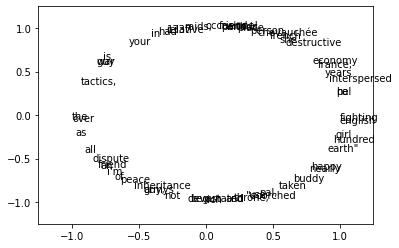

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
fig,ax = plt.subplots()
print(words)
for word in words:
  #print(word, vectors[word2int[word]][1])
  ax.annotate(word, (v2[word2int[word]][0],v2[word2int[word]][1])) # (word, (x, y)) to plot

xlimmin= min([v2[word2int[w]][0] for w in words ]) -0.25
xlimmax= max([v2[word2int[w]][0] for w in words ]) +0.25
ylimmin= min([v2[word2int[w]][1] for w in words ]) -0.25
ylimmax= max([v2[word2int[w]][1] for w in words ]) +0.25

ax.set_xlim(xlimmin, xlimmax)
ax.set_ylim(ylimmin, ylimmax)
plt.show()

# IN all dimensions, this a Pie-Volume not a CIRCLE (we can only see it in 2D)



In [0]:
# GENSIM + Spacy + textacy + NLTK + GATE -> text processing in production before passing to NN
# Sklearn, Stanford NLP -> academic models, good for prototyping/explorations/experiements
# !pip install genesis
!pip install gensim





In [0]:
from gensim.models import Word2Vec
from gensim.test.utils import common_texts, get_tmpfile
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [0]:
# ENTIRE english dictionary cannot be stored as a model on a machine
# SO GENSIM STREAMS the weights and biases into your machine dynamically, and removes when no 
# longer needed 
path = get_tmpfile('word2vec.model')
# all elements below are hyperparams
# LARGER window size => more words will be classified as same
# SMALLER window size => less words in bag-of-word, less combinations 
model = Word2Vec(common_texts, size=100, window=5,min_count=1, workers=4) # parallel threads to process 1,2,4,8
model.save("w2v.model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
# once your model is available locally, you can train it with your own data!

model = Word2Vec.load('w2v.model') # load a pretrained Word2Vec model
train_data = [['ba','black','sheep']]

x = Word2Vec(train_data+common_texts,size=100, window=5, min_count=1, workers=4  ) # didn't work for unknown reasons, no error either, correct output - still no training done
# model.train() threw error, but new model creation is working fine
v = x.wv['black']
v

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


array([ 3.17964586e-03,  3.62161850e-03, -1.43890129e-03, -8.32643345e-05,
        2.02608979e-04, -4.50908765e-03, -2.89211818e-03, -2.08158954e-03,
       -2.73584947e-03, -3.46351694e-03,  1.14787137e-03,  7.04684120e-04,
        3.18287080e-03,  3.22343176e-03,  4.01951745e-03, -1.02600614e-04,
       -2.38119392e-04, -6.09386363e-04, -2.22305395e-03, -2.24055862e-03,
        2.71522277e-03, -3.98551114e-03, -1.84104498e-03,  4.63945884e-03,
        2.31186184e-03, -4.41087410e-03,  4.01052181e-03, -3.09691881e-03,
        3.19418078e-03, -9.61725949e-04, -3.01591284e-03,  2.53090425e-03,
       -4.68183076e-03,  2.27649012e-04,  1.84950966e-03,  3.47575103e-03,
       -4.82736062e-03,  1.38496421e-03,  4.55117691e-03, -6.61056489e-04,
        3.06622591e-04, -4.78097657e-03, -1.74520956e-03, -3.39975557e-03,
        4.42660041e-03,  1.45749724e-03, -4.12633643e-03,  3.45844310e-03,
        2.68453080e-03,  4.75705415e-03, -1.11403468e-03, -7.44789257e-04,
       -3.46083101e-03,  

In [0]:
from gensim.models import KeyedVectors
path = get_tmpfile('wordvectors.kv')
model.wv.save(path)
wv = KeyedVectors.load(path, mmap='r' )
v = wv['system']

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
# spacy -> segment/token.... NLP pipeline steps  -> verb, noun,adverb,adjective,GPE
# textacy -> special function -> extract_facts, extract_semistructured_statements, verb/facts/subject 